In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn
from sklearn import linear_model
import seaborn as sns
import statsmodels.formula.api as smf
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
%matplotlib inline 
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# Import data
crime_rate = pd.read_csv('Offenses known 2013.csv', skiprows=4)

In [3]:
# Take a look at the column names
crime_rate.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [4]:
# Replace the column names 
crime_rate.columns =['City', 'Population', 'Violent_Crime',
       'Murder',
       'Rape_Revised', 'Rape_Legacy',
       'Robbery', 'Aggravated_Assault', 'Property_Crime', 'Burglary',
       'Larceny', 'Vehicle_Theft', 'Arson']

In [5]:
#A glimpse of the data tells us that we need to clean it.
crime_rate.head(20)

,City,Population,Violent_Crime,Murder,Rape_Revised,Rape_Legacy,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny,Vehicle_Theft,Arson
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,"4,089",5,0.000,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,"1,781",3,0.000,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,"118,296",107,1.000,nan,7,31,68,"2,118",204,"1,882",32,3.000
8,Amityville Village,"9,519",9,0.000,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,"18,182",30,0.000,nan,0,12,18,405,99,291,15,0.000


In [6]:
# Check initialize of data
crime_rate.shape

(351, 13)

In [7]:
# Check what type of data I have.
crime_rate.dtypes

City                   object
Population             object
Violent_Crime          object
Murder                float64
Rape_Revised          float64
Rape_Legacy            object
Robbery                object
Aggravated_Assault     object
Property_Crime         object
Burglary               object
Larceny                object
Vehicle_Theft          object
Arson                 float64
dtype: object

In [8]:
# first remove the commas 
crime_rate['Robbery'] = crime_rate['Robbery'].str.replace(',', '')
crime_rate['Population'] = crime_rate['Population'].str.replace(',', '')
crime_rate['Property_Crime'] = crime_rate['Property_Crime'].str.replace(',', '')
crime_rate['Violent_Crime'] = crime_rate['Violent_Crime'].str.replace(',', '')
crime_rate['Rape_Legacy'] = crime_rate['Rape_Legacy'].str.replace(',', '')
crime_rate['Aggravated_Assault'] = crime_rate['Aggravated_Assault'].str.replace(',', '')
crime_rate['Burglary'] = crime_rate['Burglary'].str.replace(',', '')
crime_rate['Larceny'] = crime_rate['Larceny'].str.replace(',', '')
crime_rate['Vehicle_Theft'] = crime_rate['Vehicle_Theft'].str.replace(',', '')

In [9]:
# Convert objects into float
crime_rate['Robbery'] = crime_rate['Robbery'].apply(pd.to_numeric)
crime_rate['Population'] = crime_rate['Population'].apply(pd.to_numeric)
crime_rate['Property_Crime'] = crime_rate['Property_Crime'].apply(pd.to_numeric)
crime_rate['Violent_Crime'] = crime_rate['Violent_Crime'].apply(pd.to_numeric)
crime_rate['Rape_Legacy'] = crime_rate['Rape_Legacy'].apply(pd.to_numeric)
crime_rate['Aggravated_Assault'] = crime_rate['Aggravated_Assault'].apply(pd.to_numeric)
crime_rate['Burglary'] = crime_rate['Burglary'].apply(pd.to_numeric)
crime_rate['Larceny'] = crime_rate['Larceny'].apply(pd.to_numeric)
crime_rate['Vehicle_Theft'] = crime_rate['Vehicle_Theft'].apply(pd.to_numeric)


In [10]:
# Remove 'Rape_Revised' since there's no data
crime_rate = crime_rate.drop('Rape_Revised', 1)

In [11]:
# Remove the Nan 
crime_rate = crime_rate.dropna(how='any')

In [12]:
# Attempting to clean the data a bit before using it.
crime_rate.describe()

,Population,Violent_Crime,Murder,Rape_Legacy,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny,Vehicle_Theft,Arson
count,187.000,187.000,187.000,187.000,187.000,187.000,187.000,187.000,187.000,187.000,187.000
mean,14787.053,45.979,0.567,2.193,16.556,26.663,339.824,65.037,260.872,13.914,1.872
std,27220.701,201.363,3.553,9.125,81.477,109.235,965.182,242.693,675.899,57.361,10.693
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2195.000,1.000,0.000,0.000,0.000,0.000,19.500,3.000,16.000,0.000,0.000
50%,6487.000,4.000,0.000,0.000,1.000,3.000,73.000,11.000,62.000,2.000,0.000
75%,16109.000,17.000,0.000,1.000,4.000,11.000,297.000,39.000,240.500,5.000,1.000
max,210562.000,2107.000,42.000,92.000,918.000,1055.000,10051.000,2587.000,6855.000,609.000,132.000


In [13]:
# Due to outliers, retain data by turning some parameters as categorical data. 
crime_rate['Murder_cat'] = np.where(crime_rate.loc[:, 'Murder']>0, 1, 0) 
crime_rate['Robbery_cat'] = np.where(crime_rate.loc[:, 'Robbery']>0, 1, 0) 
crime_rate['Violent_cat'] = np.where(crime_rate.loc[:, 'Violent_Crime']>0, 1, 0) 
# Remove large outliers in each column in an effort to normalize data. 
crime_rate = crime_rate.query('Population<20000')
crime_rate = crime_rate.query('Rape_Legacy<500')
crime_rate = crime_rate.query('Burglary<500')
crime_rate = crime_rate.query('Larceny<500')
crime_rate = crime_rate.query('Aggravated_Assault<500')
crime_rate = crime_rate.query('Vehicle_Theft<500')

In [14]:
# The data looks a bit more normalized now. 
crime_rate.describe()


,Population,Violent_Crime,Murder,Rape_Legacy,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny,Vehicle_Theft,Arson,Murder_cat,Robbery_cat,Violent_cat
count,148.000,148.000,148.000,148.000,148.000,148.000,148.000,148.000,148.000,148.000,148.000,148.000,148.000,148.000
mean,5801.973,6.365,0.034,0.574,1.264,4.493,92.243,14.399,75.865,1.980,0.345,0.034,0.385,0.709
std,5025.307,11.314,0.181,1.587,2.354,8.336,113.829,20.398,93.311,3.715,0.855,0.181,0.488,0.456
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1829.500,0.000,0.000,0.000,0.000,0.000,14.750,2.000,11.000,0.000,0.000,0.000,0.000,0.000
50%,3790.000,2.000,0.000,0.000,0.000,2.000,44.500,6.000,38.500,1.000,0.000,0.000,0.000,1.000
75%,8542.500,7.000,0.000,0.000,1.250,5.000,121.250,16.000,97.250,3.000,0.000,0.000,1.000,1.000
max,19800.000,89.000,1.000,13.000,12.000,64.000,533.000,100.000,398.000,35.000,5.000,1.000,1.000,1.000


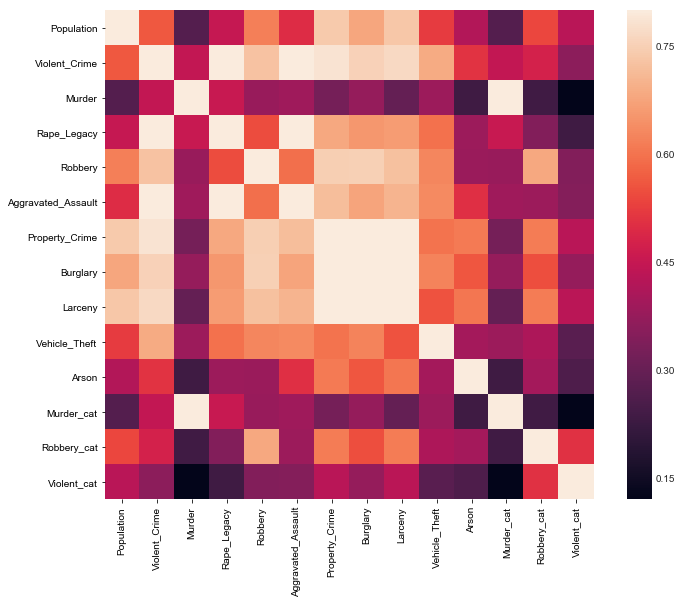

In [15]:
# Checking out the initial correlation of the data set presented.
corrmat = crime_rate.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.set_style('darkgrid')
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


# Vanilla Logistic Regression 
- Considered running SelectKBest but I decided with using PCA instead.

The goal is to see if a murder happened given other crime statistics. 


In [16]:
# Use PCA to create new columns that don't suffer from multicollinearity
from sklearn.decomposition import PCA
# drop string data, and data I want to predict.
X = crime_rate.drop(['City', 'Murder'], axis = 1)
Y = crime_rate['Murder']
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
pca_X = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',
                         'principal component 3', 'principal component 4'])

# Create Test, Train Split
X_train, X_test, Y_train, Y_test = train_test_split(pca_X, Y, test_size=0.3)

In [17]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e9)

# Fit the model.
fit = lr.fit(X_train, Y_train)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X_test)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y_test))

print('\n Percentage accuracy')
print(lr.score(X_test, Y_test))

Coefficients
[[0.00046989 0.03109399 0.40905245 0.06594556]]
[-13.94936623]

 Accuracy by admission status
Murder  0.000  1.000
row_0               
0.000      41      2
1.000       2      0

 Percentage accuracy
0.9111111111111111


# Ridge Regularization 

In [25]:
# Type out the logistic regression again for the ridge regression.
new_lr = LogisticRegression()

# Start with a GridSearchCV to find the best parameters
parameters = {'penalty':['l2'],
             'C':[0.0001,0.001,0.01,0.1,1,10,100,10000,100000,100000000]}

grid = GridSearchCV(new_lr, parameters, cv=10, verbose=3)

#Fit the data
grid.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.0001, penalty=l2 ............................................
[CV] ... C=0.0001, penalty=l2, score=0.7272727272727273, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ... C=0.0001, penalty=l2, score=0.9090909090909091, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ... C=0.0001, penalty=l2, score=0.6363636363636364, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] .................. C=0.0001, penalty=l2, score=0.8, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] .................. C=0.0001, penalty=l2, score=0.6, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] .................. C=0.0001, penalty=l2, score=0.7, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] .........

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=100, penalty=l2, score=1.0, total=   0.0s
[CV] C=100, penalty=l2 ...............................................
[CV] ..................... C=100, penalty=l2, score=1.0, total=   0.0s
[CV] C=100, penalty=l2 ...............................................
[CV] ..................... C=100, penalty=l2, score=1.0, total=   0.0s
[CV] C=10000, penalty=l2 .............................................
[CV] .... C=10000, penalty=l2, score=0.9090909090909091, total=   0.0s
[CV] C=10000, penalty=l2 .............................................
[CV] .... C=10000, penalty=l2, score=0.9090909090909091, total=   0.0s
[CV] C=10000, penalty=l2 .............................................
[CV] .... C=10000, penalty=l2, score=0.9090909090909091, total=   0.0s
[CV] C=10000, penalty=l2 .............................................
[CV] ................... C=10000, penalty=l2, score=0.9, total=   0.0s
[CV] C=10000, penalty=l2 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 10000, 100000, 100000000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [26]:
#return best parameters and best score
print('Best parameters:')
print(grid.best_params_)
print('Best Score:')
print(grid.best_score_)

Best parameters:
{'C': 1, 'penalty': 'l2'}
Best Score:
0.9805825242718447


In [27]:
#Metrics
pred_y_sklearn = grid.predict(X_test)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y_test))

print('\n Ridge Regression Percentage accuracy:')
print(grid.score(X_test, Y_test))


 Accuracy by admission status
Murder  0.000  1.000
row_0               
0.000      42      2
1.000       1      0

 Ridge Regression Percentage accuracy:
0.9333333333333333


# Lasso Regularization

In [28]:
# set up parameters for Lasso regression
new_lr = LogisticRegression()

# Start with a GridSearchCV to find the best parameters
parameters = {'penalty':['l1'],
             'C':[0.0001,0.001,0.01,0.1,1,10,100,10000,100000,100000000]}

grid = GridSearchCV(new_lr, parameters, cv=10, verbose=3)

#Fit the data
grid.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.0001, penalty=l1 ............................................
[CV] ... C=0.0001, penalty=l1, score=0.5454545454545454, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] ... C=0.0001, penalty=l1, score=0.9090909090909091, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] ... C=0.0001, penalty=l1, score=0.6363636363636364, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=0.7, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=0.3, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=0.4, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] .........

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=100, penalty=l1, score=0.9, total=   0.0s
[CV] C=100, penalty=l1 ...............................................
[CV] ..................... C=100, penalty=l1, score=1.0, total=   0.0s
[CV] C=100, penalty=l1 ...............................................
[CV] ..................... C=100, penalty=l1, score=1.0, total=   0.0s
[CV] C=100, penalty=l1 ...............................................
[CV] ..................... C=100, penalty=l1, score=1.0, total=   0.0s
[CV] C=100, penalty=l1 ...............................................
[CV] ..................... C=100, penalty=l1, score=1.0, total=   0.0s
[CV] C=10000, penalty=l1 .............................................
[CV] .... C=10000, penalty=l1, score=0.9090909090909091, total=   0.0s
[CV] C=10000, penalty=l1 .............................................
[CV] .... C=10000, penalty=l1, score=0.9090909090909091, total=   0.0s
[CV] C=10000, penalty=l1 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 10000, 100000, 100000000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [29]:
#return best parameters and best score
print('Best parameters:')
print(grid.best_params_)
print('Best Score:')
print(grid.best_score_)

Best parameters:
{'C': 0.1, 'penalty': 'l1'}
Best Score:
0.9805825242718447


In [31]:
#Metrics
pred_y_sklearn = grid.predict(X_test)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y_test))

print('\n Lasso Regression Percentage accuracy:')
print(grid.score(X_test, Y_test))


 Accuracy by admission status
Murder  0.000  1.000
row_0               
0.000      42      2
1.000       1      0

 Lasso Regression Percentage accuracy:
0.9333333333333333


# Write Up
I believe that using the PCA before using the logistic regression to predict murder was a good choice since it created these new components that explained the majority of the model's variance in the dataset. That is why even my vanilla logistic regression was 91.11% accurate. 

The ridge and lasso regression shared teh same accuracy of 93.33% accurate. It was a very slight improvement and I believe that the reason is due to the fact that after cleaning up the data in my dataset, my sample size became smaller but still useable ( from 351 rows to 148 rows after cleaning). Although the differences weren't as large, the lasso and ridge alpha behavior is similar to the previous lesson where it was observed that a smaller alpha in a lasso regression shows results earlier while a ridge regression requires a larger alpha to show results. 